# Project 1
By Alexander Hatle

In [18]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
np.random.seed(40)
#<img src="">

In [9]:
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

## Task 1
### a)

<img src="pictures/Screenshot 2022-09-19 at 11.07.35.png">

$$A = \begin{pmatrix}0 & 0 & 0 \\ 0 & 0 & 0\end{pmatrix} \quad \text{and} \quad \vec y = \begin{pmatrix}1  \\  1\end{pmatrix}$$

<img src="pictures/Screenshot 2022-09-19 at 11.12.01.png">

$$A = \begin{pmatrix}0 & 0 & 0 \\ 0 & 0 & 0\end{pmatrix} \quad \text{and} \quad \vec y = \begin{pmatrix}0  \\  0\end{pmatrix}$$

### b)

<img src="pictures/Screenshot 2022-09-19 at 11.14.49.png">

We know that a matrix A is symmetric if $A^T=A$ 
$$(A^{T}A)^{T}=A^{T}(A^{T})^{T} = A^{T}A \Rightarrow \text{Symmetric}$$
$$(AA^{T})^{T}=(A^{T})^{T} A^{T}= AA^{T} \Rightarrow \text{Symmetric}$$
A matrix is positive semi-definite if it satisfies
$$\vec x^{T}A\vec x \ge 0, \qquad \text{for all } x\in \mathbb{R}^{n}$$
$$\vec x^{T}A^{T}A\vec x = (A\vec x)^{T }A\vec x= ||A\vec x||^{2} \ge 0$$
$$\vec x^{T}AA^{T}\vec x=(A^{T}\vec x)^{T}A^{T}\vec x=||A^{T}\vec x||^{2} \ge 0$$
So both $A^{T}A$ and $AA^{T}$ are symmetric positive semi-definite.

In [6]:
#TODO 1b) invertibility
# mxm invertible, nxn not invertible

### c)

<img src="pictures/Screenshot 2022-09-19 at 11.35.33.png">

$$\begin{align*}
\mathcal{L}(\vec x, \vec \lambda) &= \vec x^{T}\vec x+\vec \lambda^T(A\vec x -\vec y)\\
&=\sum\limits_{i=1}^{n}\left(\vec x_{i}^{2} + \lambda_{i}\left(\sum\limits_{j=1}^{m}a_{ij}x_{j}-y_{i}\right)\right)\\
\frac{\partial \mathcal{L}}{\partial x_{k}}&=2x_{k}+\frac{\partial}{\partial x_{k}}\sum\limits_{i=1}^{n}\lambda_{i}\sum\limits_{j=1}^{m}a_{ij}x_i\\
&=2x_{k}+\sum\limits_{i=1}^{n}\lambda_{k}a_{ik}\\
\nabla_{x}\mathcal{L}&=2\vec x +A^{T}\vec \lambda=0&\qquad\text{(1)}\\
\frac{\partial\mathcal{L}}{\partial \lambda_{k}}&=\sum\limits_{j=1}^{m}a_{kj}x_{j}-y_{k}\\
\nabla_{\lambda}\mathcal{L}&=A\vec x-\vec y=0 &\qquad\text{(2)}\\
\vec x&=- \frac{1}{2}A^{T}\vec \lambda\qquad&\text{rewriting (1)}\\
 A\left(- \frac{1}{2}A^{T}\vec \lambda\right)&=- \frac{1}{2}AA^{T}\vec \lambda=\vec y&\text{(1) in (2)}\quad\\
\vec \lambda&=-2(AA^{T})^{-1}\vec y\\
2\vec x +A^{T}\vec\lambda&=2\vec x-2A^{T}(AA^{T})^{-1}\vec y=0 &\text{in (2)}\\
\vec x &=A^{T}(AA^{T})^{-1}\vec y \qquad\square
\end{align*}$$

### d)

<img src="pictures/Screenshot 2022-09-19 at 12.43.09.png">

<img src="pictures/Screenshot 2022-09-19 at 12.42.42.png">

We know that  $\vec x_{min}= A^{T}(AA^{T})^{-1}\vec y$  and $Q^{T}Q=I$ since $Q$ is orthogonal.
$$AA^{T}=AQR=(Q^{T}A^{T})^{T}R=(Q^{T}QR)^{T}R=R^TR$$
$$\vec x_{min}=QR(R^{T}R)^{-1}\vec y=QRR^{-1}R^{-T}\vec y$$
$$\vec x_{min}=QR^{-T}\vec y$$


In [5]:
def gramSchidt(A):
    n, m = A.shape
    Q = np.zeros((n,m))
    R = np.zeros((m,m))
    for k in range(m):
        sum = 0
        for j in range(k):
            sum += np.dot(A[:,k], Q[:,j]) * Q[:,j]
        u = A[:,k] - sum
        Q[:,k] = u / np.linalg.norm(u)
    # Make R
    for i in range(n):
        for j in range(i, m):
            R[i, j] = np.dot(A[:,j], Q[:,i])
    return Q, R

In [6]:
A = np.array([[1,5,3,2],
            [9,1,5,2]], dtype=float)
Q, R = gramSchidt(A.transpose())
print("Q\n", Q)
print("R\n", R)
print("QR\n", np.dot(Q,R))

print("--------Numpy.linalg.qr---------")
result = np.linalg.qr(A.transpose())
print("Q\n", result[0])
print("R\n", result[1])
print("QR\n", result[0]@result[1])

Q
 [[ 0.16012815  0.89458644]
 [ 0.80064077 -0.35445878]
 [ 0.48038446  0.27006383]
 [ 0.32025631  0.03375798]]
R
 [[6.244998   5.28422908]
 [0.         9.1146543 ]]
QR
 [[1. 9.]
 [5. 1.]
 [3. 5.]
 [2. 2.]]
--------Numpy.linalg.qr---------
Q
 [[-0.16012815  0.89458644]
 [-0.80064077 -0.35445878]
 [-0.48038446  0.27006383]
 [-0.32025631  0.03375798]]
R
 [[-6.244998   -5.28422908]
 [ 0.          9.1146543 ]]
QR
 [[1. 9.]
 [5. 1.]
 [3. 5.]
 [2. 2.]]


### e)

<img src="pictures/Screenshot 2022-09-19 at 14.09.50.png">

$$\begin{align*}
\vec x_{min}&= QR^{-T}\vec y\\
\text{We define}\\
\vec u&=R^{-T}\vec y \\
 \vec y &=R^{T}\vec u\\
\vec x_{min}&= Q\vec u 
\end{align*}$$
So we will use backward subtitution to find $\vec u$ and forward subtitution to find $\vec x_{min}$.


In [55]:
def findXmin(Q, R, y):
    u = linalg.solve_triangular(np.copy(R.transpose()), y, lower = True)
    return np.dot(Q, u)

# TODO test on system in 1a
# TODO test on system with exactly one solution

### f)
#### Compare these methods:

<img src="pictures/Screenshot 2022-09-19 at 14.16.25.png">

In [10]:
# Handed out code
def generate_Problem(m, n, N = 100):
    A = generate_A(m,n)

    # Generate solutions X columnwise, X[:,i] to access i-th vector
    X = np.random.normal(0.0,1.0,(A.shape[1],N))

    # Generate left hand sides Y columnwise Y[:,i] to access lhs
    Y = np.dot(A,X)
    return X.copy(), Y.copy(), A.copy(), N
X, Y, A, N = generate_Problem(3,2)
# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(2, 100)
(3, 100)


In [187]:
%%timeit -r 5
np.random.seed(40)
X, Y, A, N = generate_Problem(2048, 8096)
Q, R = gramSchidt(A.transpose())
X_mins = np.zeros(X.shape)
for i in range(N):
    X_mins[:,i] = findXmin(Q.copy(), R.copy(), Y[:,i])

5min 3s ± 18.3 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [20]:
np.random.seed(40)
X, Y, A, N = generate_Problem(3, 4)
Q, R = gramSchidt(A.transpose())
X0_min = findXmin(Q.copy(), R.copy(), Y[:,0])
print(np.linalg.norm(X[:,0] - X0_min))

0.9974393630875305


Let's compare this with numpy's method:

In [14]:
def numpyMethod(AAt, y):
    z = np.linalg.solve(AAt, y)
    return np.dot(A.transpose(), z)

In [201]:
%%timeit -r 5
np.random.seed(40)
X, Y, A, N = generate_Problem(2048, 8096)
X_mins = np.zeros(X.shape)
AAt = np.dot(A, np.transpose(A))

for i in range(N):
    X_mins[:,i] = numpyMethod(AAt, Y[:,i])

27.1 s ± 1.54 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [19]:
np.random.seed(40)
X, Y, A, N = generate_Problem(3, 4)
AAt = np.dot(A, np.transpose(A))
X0_min = numpyMethod(AAt, Y[:,0])
print(np.linalg.norm(X[:,0] - X0_min))
#TODO comment on time

0.9974393630875306


## Task 2
### a)

<img src = "pictures/Screenshot 2022-09-19 at 14.11.38.png">

We have
$$T(\vec x) = ||A\vec x-\vec y||^{2} + \mu||\vec x||^{2}$$
Let's call $\vec v=A\vec x-\vec y$ and introduce the frobernius inner product ( : ).

$d\vec v=Ad\vec x$ 
$$\begin{align*}
T(\vec x) &= ||\vec v||^{2}+\mu||x||^{2}\\
&=(\vec v:\vec v) + \mu\cdot(\vec x:\vec x)\\
\nabla_xT(\vec x)&=(2\vec v:d\vec v) +\mu(2\vec x:d\vec x)\\
&=(2(A\vec x-\vec y):Ad\vec x)+\mu(2\vec x:d\vec x)\\
&=2A^{T}(A\vec x-\vec y)+2\mu\vec x
\end{align*}$$
For a solution $\vec x_{r}$:
$$\nabla_{x} T=2A^{T}A\vec x_{r}-2A^{T}\vec y+2\mu\vec x_{r}=0$$
$$(A^{T}A+\mu I)\vec x_{r}=A^{T}\vec y \qquad\square$$
We saw in 1b) that $A^TA$ is SPD and invertible. 
$\mu I$ is diagonal and therefore symmetric and invertible since $\mu ≠0$.
$$\vec x^{T}\mu I\vec x =\mu ||\vec x||^{2} \ge 0 \qquad \forall\quad \vec x\in\mathbb{R^n}$$
Since $\mu>0$ 

### b)

<img src = "pictures/Screenshot 2022-09-19 at 14.12.21.png">

We have: $A=U\Sigma V^{T}$ and therefore $A^{T}=V\Sigma^{T}U^{T}$
Where $U\in\mathbb{R}^{mxm},V\in\mathbb{R}^{nxn}$ are unitary matrices $(U^{-1}=U^{T}, V^{-1}=V^{T})$  and $\Sigma\in\mathbb{R}^{mxn}$ is a rectangular matrix containing only values on the diagonal.

From last problem:
$$(A^{T}A+\mu I_{n})\vec x_{r}=A^{T}\vec y$$
$$(V\Sigma^{T}U^{T}U\Sigma V^{T}+\mu I_{n})\vec x_{r}=V\Sigma^T U^{T}$$
$$(V\Sigma^{T}\Sigma V^{T}+\mu I_{n})\vec x_{r}=V\Sigma^T U^{T}$$
$$\mu I_{n}=\mu VV^{T}=V \mu V^{T}=V \mu I_{n} V^{T}$$
since multiplying a scalar with a matrix is commutative. Putting this back in the original expression:
$$V(\Sigma^{T}\Sigma+\mu I_{n})V^{T}\vec x_{r}= V\Sigma^T U^{T} \vec y$$
$$\begin{align*}
\vec x_{r}&=(V(\Sigma^{T}\Sigma+\mu I_{n}) V^{T})^{-1}V\Sigma^T U^{T}\vec y\\
&=(V^{T})^{-1}(\Sigma^{T}\Sigma+\mu I_{n})^{-1}V^{-1}V\Sigma^T U^{T}\vec y\\
&=V(\Sigma^{T}\Sigma+\mu I_{n})^{-1}\Sigma^T U^{T}\vec y\\
\vec x_{r}&=VDU^{T}\vec y 
\end{align*}$$
Where
$$D=(\Sigma^{T}\Sigma+\mu I_{n})^{-1}\Sigma^T$$ 

 Let's compute this, using $\Sigma=diag(\sigma_{1},\dots,\sigma_{m})\in\mathbb{R}^{mxn}$ :
$$\begin{align*}
\Sigma^{T}\Sigma&=diag(\sigma_{1}^2,\dots \sigma_{m}^2,0,\dots 0)\in\mathbb{R}^{nxn}\\
\mu I_{n}&=diag(\mu,\dots,\mu)\in\mathbb{R}^{nxn}\\
\Sigma^{T}\Sigma+\mu I_{n}&=diag(\mu+ \sigma_{1}^2,\dots,\mu+\sigma_{m}^2,\mu,\dots,\mu)\in\mathbb{R}^{nxn}\\
(\Sigma^{T}\Sigma+\mu I_{n})^{-1}&=diag\left( \frac{1}{\mu+\sigma_{1}^2},\dots, \frac{1}{\mu+\sigma_{m}^2}, \frac{1}{\mu},\dots, \frac{1}{\mu}\right)\in\mathbb{R}^{nxn}\\
(\Sigma^{T}\Sigma+\mu I_{n})^{-1}\Sigma^{T}&=diag\left( \frac{\sigma_{1}}{\mu+\sigma_{1}^2} , \dots, \frac{\sigma_{m}}{\mu+\sigma_{m}^2}\right)\in\mathbb{R}^{nxm}
\end{align*}$$


### c)

<img src = "pictures/Screenshot 2022-09-19 at 14.12.43.png">

In [24]:
def Tikhonov_solveSVD(U, S, Vt, mu, y):
    m, n = U.shape[0], Vt.shape[0]
    D = S / (mu + S**2)
    U_new = U.T*D.T
    DUt = np.concatenate((U_new, np.zeros((n-m, m))))
    return np.dot(np.dot(Vt.T, DUt), y)#Vt.T@DUt@y
    #np.dot(np.dot(Vt.T, DUt), y)



X, Y, A, N = generate_Problem(3, 4)
U, S, Vt = np.linalg.svd(A, full_matrices=False)
mu = 1

#S = np.array([[1,2,3]])
#U = np.array([[1,1,1],
#[2,2,2],
#[3,3,3]])
#print("A\n", A)
#print("U\n", U)
#print("S\n", S)
#print("Vt\n", Vt)
x_sol = Tikhonov_solveSVD(U,S,Vt, mu, Y[:,0])
print(x_sol)
print(X[:,0])

print("\n", np.linalg.norm(A@x_sol - Y[:,0])**2 + mu * np.linalg.norm(x_sol)**2)
print("\n", np.linalg.norm(A@X[:,0] - Y[:,0])**2 + mu * np.linalg.norm(X[:,0])**2)


[ 0.12025406  0.68438291 -0.07799737 -0.54119321]
[ 0.51724896  1.13932528  0.40956558 -0.75905444]

 1.7110990282007075

 2.3095161876313925


### d)
#### 1)

<img src = "pictures/Screenshot 2022-09-19 at 14.13.15.png">

In [77]:
np.random.seed(40)
X, Y, A, N = generate_Problem(m = 2048, n= 8096, N = 1)
x_true = X[:,0]
y = Y[:,0]
U, S, Vt = np.linalg.svd(A.copy(), full_matrices=False)
num = 100
mu = np.logspace(5, -6, num = num)
error_SVD = np.zeros(num)
for i in range(num):
    x_r = Tikhonov_solveSVD(U,S,Vt, mu[i], y)
    error_SVD[i] = np.linalg.norm(x_true - x_r)
#TODO time

In [86]:
AtA =  np.dot(A.T, A)
Aty = np.dot(A.T, y)
num_np = 20
mu_np = np.logspace(5, -6, num = num_np)
error_np = np.zeros(num_np)
for i in range(num_np):
    x_r = np.linalg.solve(AtA + mu_np[i]*np.eye(8096), Aty)
    error_np[i] = np.linalg.norm(x_true - x_r)

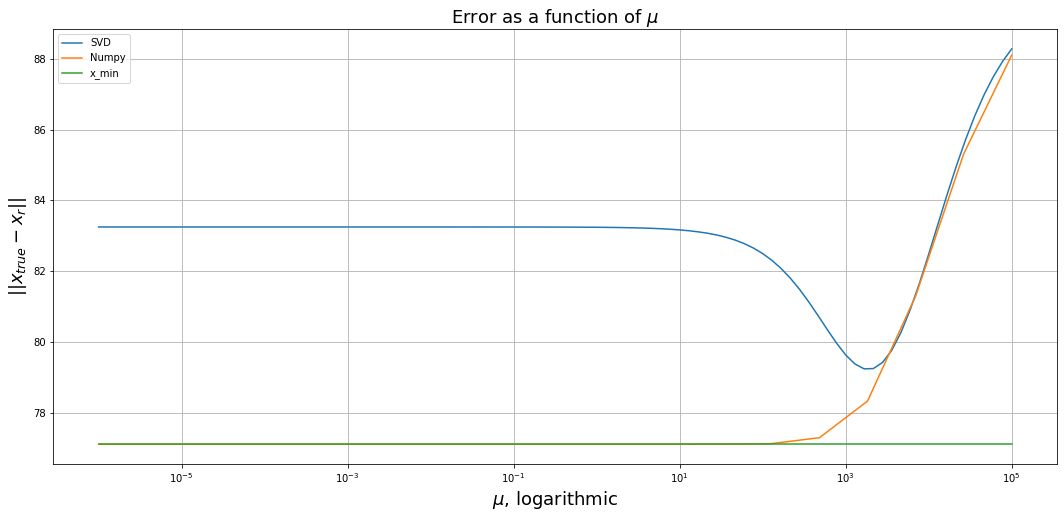

In [87]:
AAt = np.dot(A, A.T)
xmin = numpyMethod(AAt, Y[:,0])
plt.figure(0, figsize = (18,8))
plt.title(r'Error as a function of $\mu$', fontsize = 18)
plt.xlabel(r'$\mu$, logarithmic', fontsize = 18)
plt.ylabel(r'$||x_{true}-x_r||$', fontsize = 18)
plt.grid('true')
plt.plot(mu, error_SVD, label = 'SVD')
plt.plot(mu_np, error_np, label = 'Numpy')
plt.plot(mu, np.repeat(np.linalg.norm(x_true-xmin), num), label = r'x_min')
plt.legend()
plt.xscale('log')

#### 2)

<img src="pictures/Screenshot 2022-09-19 at 14.13.45.png">

## Task 3
### a)

<img src="pictures/Screenshot 2022-09-19 at 14.14.39.png">

Let's first show that $B^{2}=B$.

We know that a matrix $A$ with pairwise orthogonal columns has the property $A^TA=I$   but $AA^{T}≠I$

$$\begin{align*}
B&=I-WW^{T}\\
B^{2}&=(I-WW^{T})(I-WW^{T})\\
&=I^{2}-IWW^{T}-WW^{T}I+WW^{T}WW^{T}\\
&=I-2WW^{T}+WW^{T}\\
B^{2}&=I-WW^{T}=B
\end{align*}$$

We should explore B's eigenvectors before looking at if B is SP(semi-)D. 

Definition of eigenvectors, with eigenvector $\vec v$ and eigenvalue $\lambda$:
$$\begin{align*}
B\vec v&=\lambda\vec v\\
B^{2}\vec v&=\lambda^{2}\vec v\\
B^{2}\vec v&=B\vec v = B^{3}\vec v =\lambda^{3}\vec v
\end{align*}$$
So we have that since B is a projection matrix, then $\lambda=\lambda^{2}=\lambda^{3}=\dots$

Then the only two eigenvalues possible are
$$\lambda=0 \qquad\lor\qquad \lambda=1$$
B is symmetric: $B^{T}=I^{T}-(WW^{T})^{T}=I-WW^{T}=B$

Now we can use the spectral theorem to prove that B is symmetric positive semi-definite. 

Spectral theorem: There exists a Q such that
$$B=Q^{T}\Lambda Q$$
Where $\Lambda=diag(\lambda_{1},\dots \lambda_{n})$
Let's insert this into the definition of a symmetric positive semi-definite matrix:
$$\vec x^{T}B\vec x\ge0 \qquad\forall\quad \vec x\in\mathbb{R}^{n}$$
$$\begin{align*}
\vec x^{T}Q^{T}\Lambda Q\vec x&=(Q\vec x) ^{T} \Lambda Q\vec x\\
&=\sum\limits_{i=1}^{n}\lambda_{i}(Q\vec x)_{i}^{2} \ge0
\end{align*}$$
Where the last inequality is because  $\lambda_{i}=0 \quad\lor\quad \lambda_{i}=1 \quad \text{for}\quad i=1,\dots n$ 

B is therefore a projection matrix and is symmetric positive semi-definite.  $\square$ 

### b)
#### 1)

#### 2)

#### 3)

### c)
#### 1)

<img src = "pictures/Screenshot 2022-09-23 at 13.31.49.png">

As before, let us define $T(\vec x)$ 
$$T(\vec x)=||A\vec x-\vec y||^{2}+\mu||B\vec x||^{2}$$
From this we want to calculate $\nabla_{x}T(\vec x)$. From problem 2a) we know that
$$\nabla_{x}||A\vec x-\vec y||^{2} = 2A^{T}(A\vec x-\vec y)$$
So we only need to calculate $\nabla_{x}\mu||B\vec x||^2$. Again, we introduce the Frobernius inner product $(:)$ 
$$\begin{align*}
\nabla_{x}\mu||B\vec x||^{2}&=\nabla_{x}\mu(B\vec x:B\vec x)\\
&=\nabla_{x}\mu(B^{T}B\vec x:\vec x)\\
&=\mu(2B^{T}B\vec x:d\vec x)\\
&=2\mu B^{T}B\vec x
\end{align*}$$
Inserting the two terms back in $T(\vec x)$:
$$\nabla_{x}T(\vec x) = 2A^{T}(A\vec x-\vec y) + 2\mu B^{T}B\vec x$$
$$(A^{T}A+\mu B^{T} B)\vec x=A^{T}\vec y\qquad\square$$
For our system:
$$\vec x=\begin{pmatrix}\vec u \\ \vec v\end{pmatrix}$$
$$A = \begin{pmatrix}I & I\end{pmatrix}$$
$$A^{T}A=\begin{pmatrix}I & I \\ I  & I\end{pmatrix}$$
$$B=\begin{pmatrix}B_{0} & 0 \\ 0 & B_1\end{pmatrix}=\begin{pmatrix}I-W_{0}W_{0}^{T} & 0 \\ 0 & I-W_{1}W_{1}^{T}\end{pmatrix}$$
B is symmetric since $B_0,B_1$ are symmetric, and $B_{0}^{2}=B_{0}$ and $B_{1}=B_{1}^{2}$:
$$\begin{align*}
\mu B^{T}B&=\mu\begin{pmatrix}B_{0}^{2} & 0 \\ 0 & B_{1}^{2}\end{pmatrix}\\
&=\mu\begin{pmatrix}B_{0} & 0\\
0 &B_1\end{pmatrix}\\
&=\begin{pmatrix}\mu(I-W_{0}W_{0}^{T})  & 0\\
0&\mu(I-W_{1}W_{1}^{T})\end{pmatrix}
\end{align*}$$
$$A^{T}\vec y=\begin{pmatrix}I \\ I\end{pmatrix}\vec y=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$

Inserting all this back in the original system:
$$(A^{T}A+\mu B^{T} B)\vec x=A^{T}\vec y$$
$$\left[\begin{pmatrix}I & I \\ I & I\end{pmatrix} + \begin{pmatrix}\mu(I-W_{0}W_{0}^{T})  & 0\\
0&\mu(I-W_{1}W_{1}^{T})\end{pmatrix} \right]\begin{pmatrix}\vec u \\ \vec v \end{pmatrix}=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$
$$\begin{pmatrix}I+\mu(I-W_{0}W_{0}^{T})  & I\\
I&I+\mu(I-W_{1}W_{1}^{T}) \end{pmatrix} \begin{pmatrix}\vec u \\ \vec v \end{pmatrix}=\begin{pmatrix}\vec y \\ \vec y\end{pmatrix}$$



#### 2)

#### 3)

### d)